In [9]:
import requests
stock=input("請輸入股票代碼")
res = requests.get('https://tw.stock.yahoo.com/_td-stock/api/resource/FinanceChartService.ApacLibraCharts;symbols=%5B%22'+stock+'.TW%22%5D;type=tick?bkt=%5B%22tw-qsp-exp-no2-1%22%2C%22test-es-module-production%22%2C%22test-portfolio-stream%22%5D&device=desktop&ecma=modern&feature=ecmaModern%2CshowPortfolioStream&intl=tw&lang=zh-Hant-TW&partner=none&prid=2h3pnulg7tklc&region=TW&site=finance&tz=Asia%2FTaipei&ver=1.2.902&returnMeta=true')
res

請輸入股票代碼2330


<Response [200]>

In [10]:
jd = res.json()['data']

In [11]:
close = jd[0]['chart']['indicators']['quote'][0]['close']

In [12]:

timestamp = jd[0]['chart']['timestamp']

In [13]:
import pandas
df = pandas.DataFrame({'timestamp': timestamp, 'close':close})

In [14]:
df.head()

,timestamp,close
0,1624323600,NaN
1,1624323660,586.0
2,1624323720,587.0
3,1624323780,587.0
4,1624323840,587.0


In [15]:
df['dt'] = pandas.to_datetime(df['timestamp'] + 3600 * 8, unit = 's')

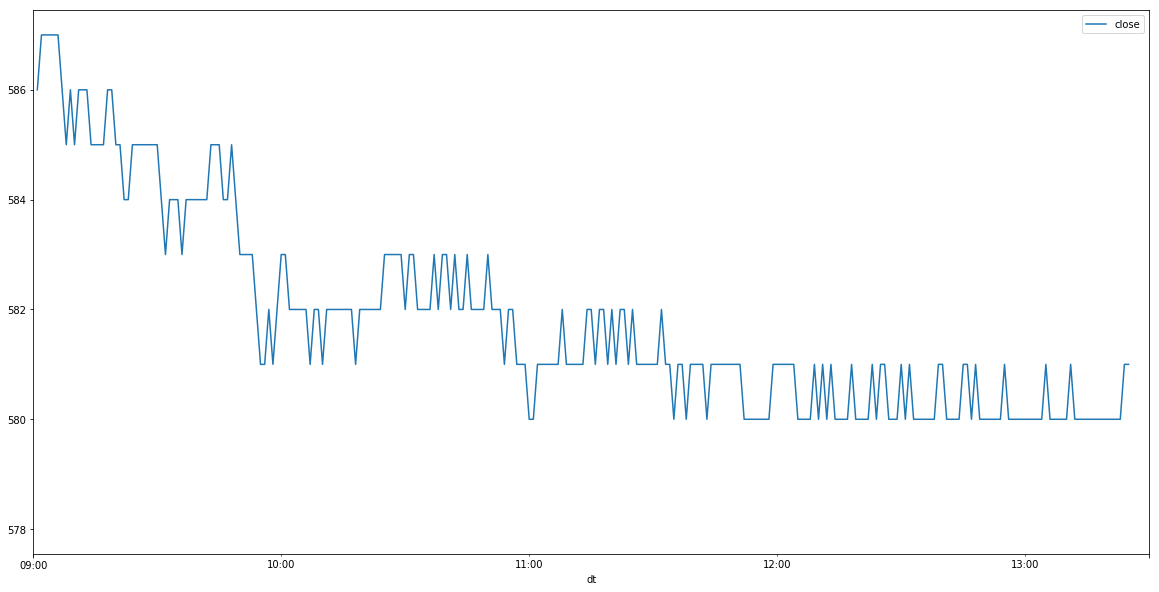

In [16]:
%matplotlib inline
df.plot('dt', 'close', figsize = [20,10])